### Problema 01
Uma equipe de engenharia est´a planejando a constru¸c˜ao de uma ponte sobre um rio em
uma ´area pr´oxima a Toledo (PR). Para escolher o melhor local, ´e necess´ario encontrar a
menor distˆancia entre as margens em um trecho de 500 metros do rio.
Com base em imagens de sat´elite, foram medidas as distˆancias entre uma linha de referˆencia
(reta X) e cada uma das margens do rio — Margem 1 (M1) e Margem 2 (M2) — em
intervalos de 100 metros, conforme a tabela:
![table](table.png)

In [13]:
import math
from typing import Callable,Tuple
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
class Lagrange():
    def __init__(self,x,points):
        self.x = x
        self.x_points, self.y_points = zip(*points)
        

    def L(self,j,x):
        L = math.prod(
            [
                (x-self.x_points[k])/
                (self.x_points[j]-self.x_points[k]) if (self.x_points[j]-self.x_points[k]) != 0 else 1
                for k in range(len(self.x_points)) 
                if k != j
            ]
        )
        # print(f'L{j}:{L}')
        return L
    def l(self,x):

        return sum(
            [
                Y*self.L(j,x)
                for j,Y in enumerate(self.y_points)
            ]
        )

    def plot(self):
        columns = [f"L{j}(x)" for j in range(len(self.x_points))]+['P(X)']
        data = [[self.L(j, x) for j in range(len(self.x_points))]+[self.l(x)] for x in self.x]
        df = pd.DataFrame(data, columns=columns, index=[f"x={val}" for val in self.x])
        print(df)
        x_vals = np.linspace(0, 500, 200)
        y_vals = [self.l(x) for x in x_vals]
        plt.scatter(self.x_points, self.y_points, color='red', s=50, zorder=5, label='Pontos')
        plt.scatter(self.x,[self.l(x) for x in self.x],color = 'orange',s=50,zorder=5,label = 'Alvos')
        plt.plot(x_vals,y_vals,color = 'blue',label = 'Lagrange')
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("Lagrange")
        plt.grid(True)
        plt.legend()
        plt.show() 


Interpola¸c˜ao: Utilize o m´etodo de interpola¸c˜ao polinomial para estimar as distˆancias
das margens em intervalos de 50 metros. Calcule a distˆancia entre as margens em cada
um desses pontos.

X0 distance = 18.95
X1 distance = 19.56
X2 distance = 20.40
X3 distance = 20.60
X4 distance = 20.00
X5 distance = 18.94
X6 distance = 17.98
X7 distance = 17.68
X8 distance = 18.33
X9 distance = 19.71
X10 distance = 20.83
Menor distancia:17.68 
No ponto: 350 m


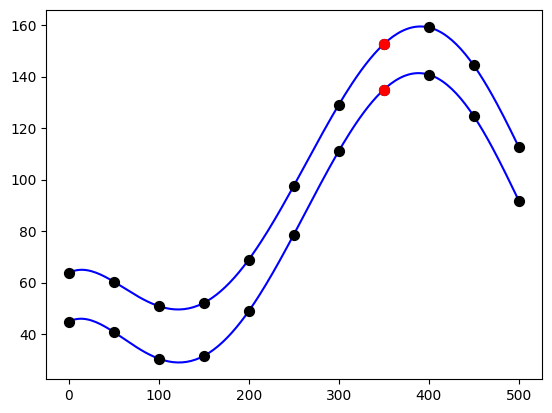

In [33]:
pointsm1 = [
    (0,44.8),
    (100,30.45),
    (200,48.92),
    (300,111.07),
    (400,140.76),
    (500,91.82)
]
X = list(range(0,501,50))
# x = [50]
pointsm2 = [
    (0,63.75),
    (100,50.85),
    (200,68.92),
    (300,129.05),
    (400,159.09),
    (500,112.65)
]
margem_1 = Lagrange(X,pointsm1)
margem_2 = Lagrange(X,pointsm2)

# Plotar
M1_50 = [margem_1.l(x) for x in X]
M2_50 = [margem_2.l(x) for x in X]
x_vals = np.linspace(0, 501, 200)
M1_50LN = [margem_1.l(x) for x in x_vals]
M2_50LS = [margem_2.l(x) for x in x_vals]
distances = []
for i,point in enumerate(X):
    distance = margem_2.l(point)-margem_1.l(point)
    distances.append(distance)
    print(f'X{i} distance = {distance:.2f}')
distance_min = min(distances)
print(f'Menor distancia:{distance_min:.2f} ')
plt.scatter(X,M1_50, color='black', s=50, zorder=5, label='Margen_Norte')
plt.scatter(X,M2_50, color='black', s=50, zorder=5, label='Margen_Sul')
plt.plot(x_vals,M1_50LN,color = 'blue')
plt.plot(x_vals,M2_50LS,color = 'blue')
for x in X:
    if distance_min == margem_2.l(x)-margem_1.l(x):
        print('No ponto:',x,'m')
        plt.scatter(x,margem_1.l(x), color='red', s=50, zorder=5, label='Margen_Norte')
        plt.scatter(x,margem_2.l(x), color='red', s=50, zorder=5, label='Margen_Sul')


X0 distance = 18.95
X1 distance = 19.56
X2 distance = 20.40
X3 distance = 20.60
X4 distance = 20.00
X5 distance = 18.94
X6 distance = 17.98
X7 distance = 17.68
X8 distance = 18.33
X9 distance = 19.71
X10 distance = 20.83
Menor distancia:17.68


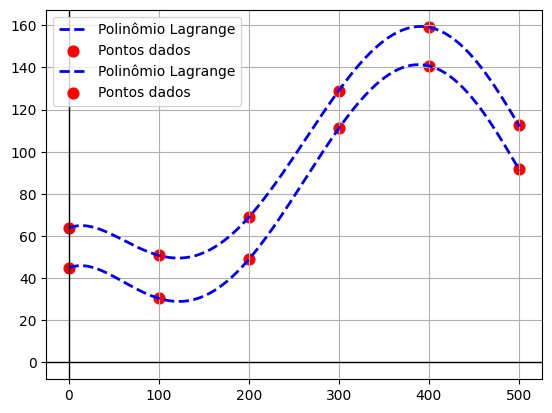

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Dados
x = np.array(list(range(0,501,100)))
y = np.array([44.8,30.45,48.92,111.07,140.76,91.82])
# y = np.array([44.8,30.45,48.92,111.07,140.76,91.82])
y2 = np.array([63.75,50.85,68.92,129.05,159.09,112.65])
# Polinômio de Lagrange pronto
p = lagrange(x, y)
p2 = lagrange(x, y2)
# print("Coeficientes do polinômio:", p)

# Gera pontos para plotar
xx = np.linspace(0, 501, 200)
yy = p(xx)
yy2 = p2(xx)
# Gráfico
plt.plot(xx, yy, 'b--', lw=2, label='Polinômio Lagrange')
plt.scatter(x, y, color='red', s=60, label='Pontos dados')
plt.plot(xx, yy2, 'b--', lw=2, label='Polinômio Lagrange')
plt.scatter(x, y2, color='red', s=60, label='Pontos dados')
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.legend()
plt.grid(True)
D = []
for i,(x,y1,y2) in enumerate([(x,p(x),p2(x)) for x in range(0,501,50)]):
    dis = y2-y1
    print(f'X{i} distance = {(dis):.2f}')
    D.append(dis)
md = min(D)
print(f'Menor distancia:{md:.2f}')

